In [189]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [190]:
dir = os.getcwd()

In [191]:
with open(dir+'\\models\\finbert_LSTM_model.pkl', 'rb') as f:
    LSTM = pickle.load(f)

with open(dir+'\\models\\finbert_GRU_model.pkl', 'rb') as f:
    GRU = pickle.load(f)

with open(dir+'\\models\\finbert_MLP_model.pkl', 'rb') as f:
    MLP = pickle.load(f)

with open(dir+'\\models\\finbert_RNN_model.pkl', 'rb') as f:
    RNN = pickle.load(f)


In [192]:
sc_X = pickle.load(open(dir+'\\data\\sc_X.pkl', 'rb'))
sc_y = pickle.load(open(dir+'\\data\\sc_y.pkl', 'rb'))
X_dev = pickle.load(open(dir+'\\data\\X_dev.pkl', 'rb'))
y_dev = pickle.load(open(dir+'\\data\\y_dev.pkl', 'rb'))
y_dev_raw = pickle.load(open(dir+'\\data\\y_dev_raw.pkl', 'rb'))

In [193]:
y_dev = sc_y.inverse_transform(y_dev)
y_dev = y_dev.reshape(-1)

In [194]:
def predict(model, X_dev,sc_y):
    y_pred = model.predict(X_dev)
    y_pred = sc_y.inverse_transform(y_pred)
    y_pred = y_pred.reshape(-1)

    return y_pred

In [195]:
y_lstm_pred = predict(LSTM, X_dev,sc_y)

3/3 [==============================] - 1s 24ms/step


In [196]:
openprices = pickle.load(open(dir+"\\data\\X_finbert_dev.pkl", "rb"))

In [197]:
len(openprices)

93

In [198]:
y_lstm_pred

array([2.107843 , 1.9160882, 1.8395865, 1.9732323, 1.95673  , 2.0446634,
       2.0972974, 2.0472846, 2.0908566, 2.1450489, 2.1122026, 2.0992892,
       2.1396523, 2.195919 , 2.2536073, 2.2131546, 2.2826114, 2.2484083,
       2.2242749, 2.1981418, 2.1041222, 2.0624034, 2.0221758, 1.9431998,
       1.801182 , 1.8400238, 1.8232578, 1.7360191, 1.6461377, 1.5857761,
       1.6863427, 1.5557935, 1.4950796, 1.7301913, 1.7785751, 1.861426 ,
       2.0556111, 2.0998182, 2.0572712, 2.0824594, 2.104806 , 2.1578624,
       2.2643871, 2.2963934, 2.275448 , 2.216467 , 2.1208515, 2.1974533,
       2.2001297, 2.15857  , 2.187178 , 2.2828166, 2.3530433, 2.3539305,
       2.2784445, 2.229339 , 2.2546744, 2.1884418, 2.1074061, 2.1020741,
       1.9538279, 1.932274 , 1.992877 , 2.0192468, 1.8719538, 1.9074308,
       1.9028774, 1.8346481, 1.9273869, 2.054454 , 2.0080206, 2.0176344,
       2.0886292, 2.0926392, 2.1100612, 2.128037 , 2.156813 , 2.2334456,
       2.2229273, 2.0748982, 1.8124745, 1.7978286, 

In [199]:
# def invest(y_lstm_pred, y_dev_raw):
#     invest = []
#     value = 1
#     values = []
#     for i in range(len(y_lstm_pred)):
#         if y_lstm_pred[i] > y_dev_raw[i-1]:
#             invest.append(0)#0 is buy stock
#         else:
#             invest.append(1)#1 is sell stock
#     # print(invest)
#     flag = 0#flag = 0 means holding cash, flag = 1 means holding stock
#     for i in range(len(invest)):
#         if invest[i] == 0:
#             if flag == 0:
#                 value = value*(y_dev_raw[i]/y_dev_raw[i-1])
#                 flag = 1
#             else:
#                 pass
#         else:
#             if flag == 1:
#                 value = value*(y_dev_raw[i-1]/y_dev_raw[i])
#                 flag = 0
#             else:
#                 pass
#         values.append(float(value))
#     print(values)
#     return values

In [200]:
def invest(y_pred, y_dev_raw):
    cash = 0
    stock = 1
    value = []
    for i in range(1,len(y_pred)):
        if y_pred[i]>y_dev_raw[i-1]:
            if stock == 0:
                stock = cash/y_dev_raw[i-1]
                cash = 0
            else:
                pass
        else:
            if stock == 0:
                pass
            else:
                cash = stock*y_dev_raw[i-1]
                stock = 0
        value.append(cash+stock*y_dev_raw[i])
    return value


In [201]:
values_lstm = invest(y_lstm_pred, y_dev_raw)

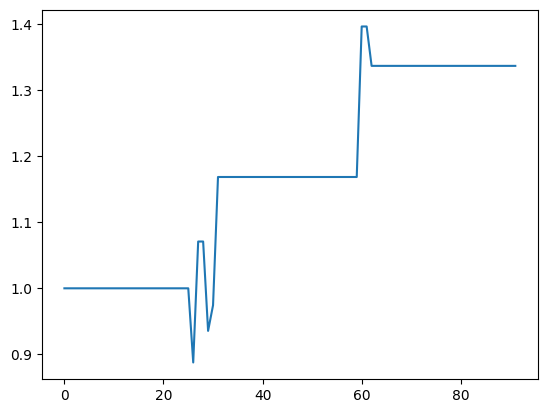

In [202]:
plt.plot(values_lstm, label = 'LSTM')
plt.show()

3/3 [==============================] - 1s 20ms/step


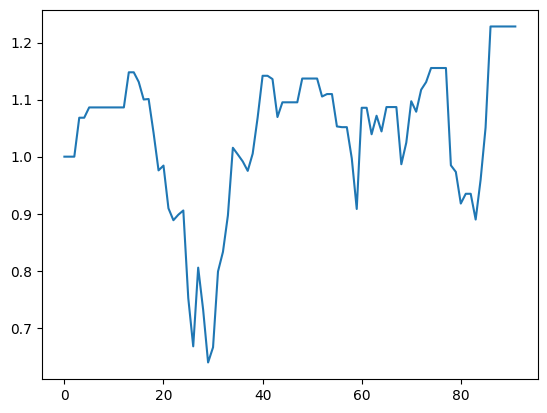

In [203]:
y_gru_pred = predict(GRU, X_dev,sc_y)
values_gru = invest(y_gru_pred, y_dev_raw)
plt.plot(values_gru, label = 'GRU')
plt.show()

3/3 [==============================] - 0s 12ms/step


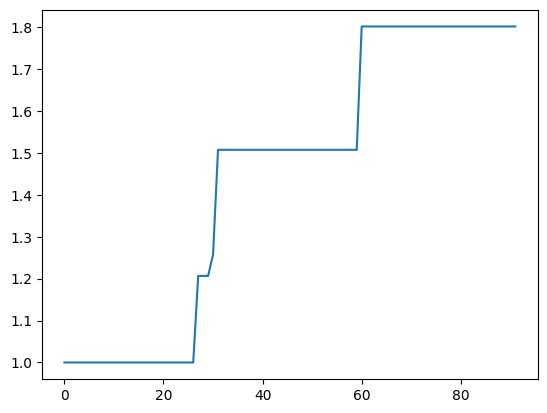

In [204]:
y_rnn_pred = predict(RNN, X_dev,sc_y)
values_rnn = invest(y_rnn_pred, y_dev_raw)
plt.plot(values_rnn, label = 'RNN')
plt.show()

3/3 [==============================] - 0s 4ms/step


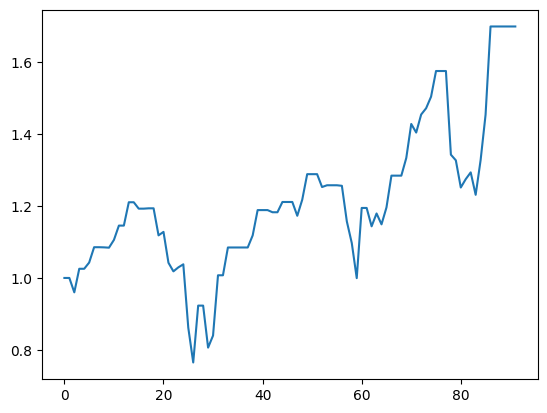

In [205]:
y_mlp_pred = predict(MLP, X_dev,sc_y)
values_mlp = invest(y_mlp_pred, y_dev_raw)
plt.plot(values_mlp, label = 'MLP')
plt.show()

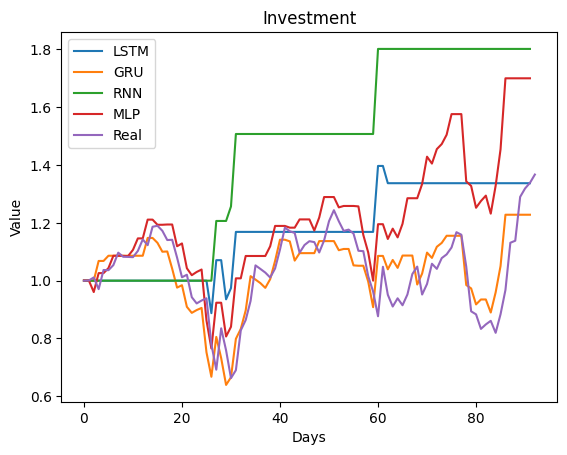

In [214]:
#画在一张图上
plt.plot(values_lstm, label = 'LSTM')
plt.plot(values_gru, label = 'GRU')
plt.plot(values_rnn, label = 'RNN')
plt.plot(values_mlp, label = 'MLP')
plt.plot(y_dev_raw, label = 'Real')
plt.legend()
plt.title('Investment')
plt.ylabel('Value')
plt.xlabel('Days')
plt.show()

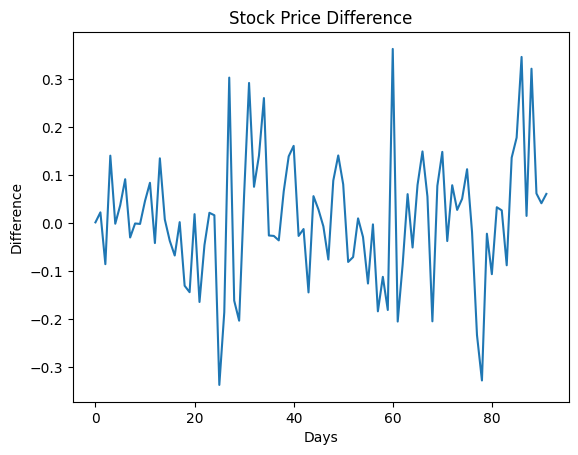

In [215]:
#y_dev_raw每一天与前一天的差值

y_dev_raw_diff = []
for i in range(1,len(y_dev_raw)):
    y_dev_raw_diff.append(y_dev_raw[i]-y_dev_raw[i-1])

plt.plot(y_dev_raw_diff)
plt.title('Stock Price Difference')
plt.ylabel('Difference')
plt.xlabel('Days')
plt.show()

In [207]:
openprices

,Open
747,43.669998
748,42.700001
749,42.525002
750,42.750000
751,42.630001
...,...
835,43.807499
836,43.970001
837,44.562500
838,46.294998


In [208]:
type(openprices)

pandas.core.frame.DataFrame

In [209]:
np.array(openprices).reshape(-1).tolist()

[43.669998,
 42.700001,
 42.525002,
 42.75,
 42.630001,
 42.540001,
 43.1325,
 43.134998,
 43.360001,
 43.587502,
 43.637501,
 43.290001,
 43.647499,
 44.044998,
 44.474998,
 44.037498,
 44.842499,
 44.6525,
 44.325001,
 44.325001,
 44.3125,
 43.627499,
 43.0,
 42.540001,
 41.3825,
 41.717499,
 41.7925,
 41.5,
 39.775002,
 38.7075,
 40.772499,
 40.072498,
 39.267502,
 39.625,
 40.487499,
 40.759998,
 42.447498,
 43.09,
 43.012501,
 43.2075,
 42.950001,
 43.4175,
 44.087502,
 44.775002,
 44.814999,
 44.634998,
 43.200001,
 43.802502,
 44.477501,
 43.735001,
 43.869999,
 44.490002,
 45.072498,
 45.647499,
 45.080002,
 44.625,
 44.662498,
 44.330002,
 43.810001,
 43.759998,
 42.5,
 42.0975,
 42.017502,
 43.419998,
 41.8125,
 41.952499,
 41.66,
 41.91,
 41.220001,
 43.145,
 42.7425,
 42.470001,
 43.25,
 43.057499,
 43.352501,
 43.695,
 43.7575,
 44.122501,
 44.452499,
 43.439999,
 42.650002,
 41.7075,
 41.4175,
 40.654999,
 41.029999,
 41.0,
 40.532501,
 41.602501,
 43.807499,
 43.970001,


In [210]:
def invest_open_price(y_pred, y_dev_raw, openprices):
    # y_dev_raw = openprices
    openprices_list = np.array(openprices).reshape(-1).tolist()
    cash = 1
    stock = 0
    value = []
    for i in range(1,len(y_pred)):
        if y_pred[i]>openprices_list[i]:
            if stock == 0:
                stock = cash/openprices_list[i]
                cash = 0
            else:
                pass
        else:
            if stock == 0:
                pass
            else:
                cash = stock*openprices_list[i]
                stock = 0
        value.append(cash+stock*y_dev_raw[i])
    return value


In [211]:
len(y_lstm_pred)

93

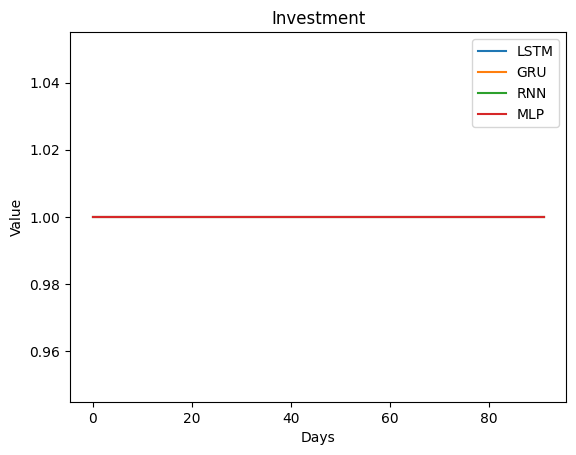

In [212]:
open_price_prediction_lstm = invest_open_price(y_lstm_pred, y_dev_raw, openprices)
open_price_prediction_gru = invest_open_price(y_gru_pred, y_dev_raw, openprices)
open_price_prediction_rnn = invest_open_price(y_rnn_pred, y_dev_raw, openprices)
open_price_prediction_mlp = invest_open_price(y_mlp_pred, y_dev_raw, openprices)

plt.plot(open_price_prediction_lstm, label = 'LSTM')
plt.plot(open_price_prediction_gru, label = 'GRU')
plt.plot(open_price_prediction_rnn, label = 'RNN')
plt.plot(open_price_prediction_mlp, label = 'MLP')
plt.legend()    
plt.title('Investment')
plt.ylabel('Value')
plt.xlabel('Days')
plt.show()